# LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get the training data

In [2]:
dfx=pd.read_csv('linearX.csv')
dfy=pd.read_csv('linearY.csv')

x=dfx.values
y=dfy.values
print(x.shape)
print(y.shape)


(99, 1)
(99, 1)


## Visualise and Preprocess

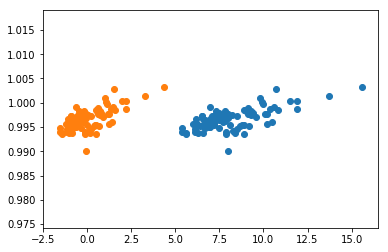

In [3]:
plt.scatter(x,y)
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)
plt.show()

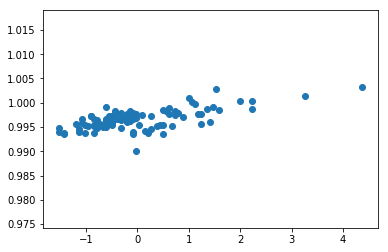

In [4]:
plt.scatter(X,Y)
plt.show()

## ALGORITHM

### Gradient Algo.
- Start with a random theta
- Repeat until converge
    - Update theta according to the rule

In [5]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

def error(X,Y,theta):
    m=X.shape[0]
    error=0
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error+=(hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad=np.zeros((2,))
    m=X.shape[0]
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
    
    return grad

#Algorithm
def gradientDescent(X,Y,learning_rate=.001):
    theta=np.zeros((2,))
    itr=0
    max_itr=100
    error_list=[]
    while(itr<=max_itr):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        itr+=1
    return theta,error_list
    
    
    
    
    

In [6]:
final_theta,error_list=gradientDescent(X,Y)

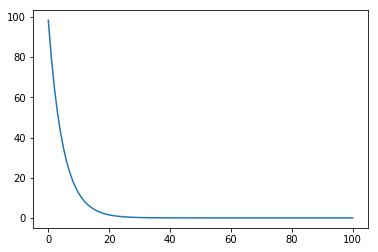

In [7]:
plt.plot(error_list)
plt.show()

In [8]:
print(final_theta)

[0.99660749 0.0013579 ]


In [9]:
### Plot the line for testing data

xtest=np.linspace(-2,6,14)
print(xtest)

[-2.         -1.38461538 -0.76923077 -0.15384615  0.46153846  1.07692308
  1.69230769  2.30769231  2.92307692  3.53846154  4.15384615  4.76923077
  5.38461538  6.        ]


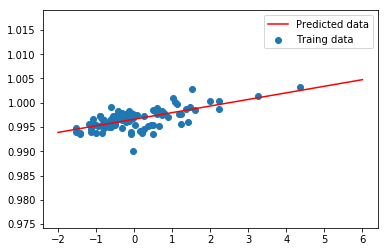

In [10]:
plt.scatter(X,Y,label='Traing data')
plt.plot(xtest,hypothesis(xtest,final_theta),color="red",label='Predicted data')
plt.legend()
plt.show()

